In [2]:
import tensorflow as tf
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

epochs = 50

### Data loading

In [3]:
mat_test = scipy.io.loadmat('data/test_32x32.mat')
mat_train = scipy.io.loadmat('data/train_32x32.mat')

### Data preprocessing

In [4]:
x_train, y_train = mat_train['X'], mat_train['y']
x_test, y_test = mat_test['X'], mat_test['y']

x_train = np.transpose(x_train, (3, 0, 1, 2))
x_test = np.transpose(x_test, (3, 0, 1, 2))

x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = np.reshape(y_train, (-1))
y_test = np.reshape(y_test, (-1))

y_train = tf.keras.utils.to_categorical(y_train - 1, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test - 1, num_classes=10)

x_train = np.mean(x_train, axis=3, keepdims=True)
x_test = np.mean(x_test, axis=3, keepdims=True)

### Model init and compilation

In [5]:
model = tf.keras.models.Sequential(layers=[
    tf.keras.layers.Conv2D(32, (3, 3), activation=tf.nn.relu, input_shape=(32, 32, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=tf.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

2023-05-18 23:25:51.305986: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Model training

In [40]:
history = model.fit(x_train, y_train, epochs=epochs)

Epoch 1/50
2290/2290 [==============================] - 26s 11ms/step - loss: 0.8797 - accuracy: 0.7303
Epoch 2/50
2290/2290 [==============================] - 28s 12ms/step - loss: 0.4950 - accuracy: 0.8600
Epoch 3/50
2290/2290 [==============================] - 29s 13ms/step - loss: 0.4139 - accuracy: 0.8816
Epoch 4/50
2290/2290 [==============================] - 28s 12ms/step - loss: 0.3630 - accuracy: 0.8957
Epoch 5/50
2290/2290 [==============================] - 33s 14ms/step - loss: 0.3270 - accuracy: 0.9051
Epoch 6/50
2290/2290 [==============================] - 29s 13ms/step - loss: 0.2968 - accuracy: 0.9133
Epoch 7/50
2290/2290 [==============================] - 29s 12ms/step - loss: 0.2715 - accuracy: 0.9203
Epoch 8/50
2290/2290 [==============================] - 29s 13ms/step - loss: 0.2502 - accuracy: 0.9263
Epoch 9/50
2290/2290 [==============================] - 29s 13ms/step - loss: 0.2315 - accuracy: 0.9313
Epoch 10/50
2290/2290 [==============================] - 41s 18m

### Accuracy and loss functions

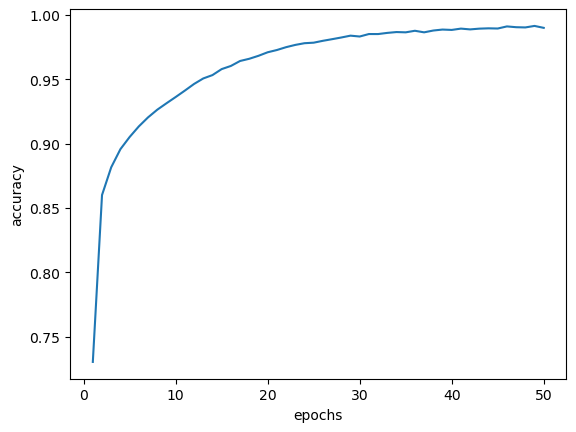

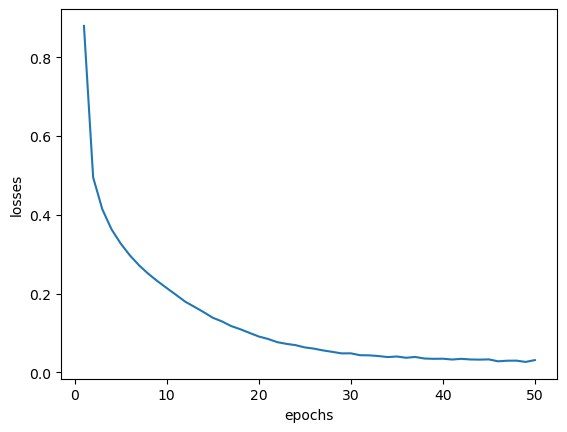

In [41]:
epochs_rate = [x+1 for x in range(epochs)]
plt.plot(epochs_rate, history.history['accuracy'])
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()

plt.plot(epochs_rate, history.history['loss'])
plt.xlabel("epochs")
plt.ylabel("losses")
plt.show()

In [42]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

814/814 [==============================] - 4s 5ms/step - loss: 1.4705 - accuracy: 0.8751
Test Loss: 1.4705013036727905
Test Accuracy: 0.8751152157783508


### Exporting model to tflite

In [43]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", "wb") as f:
    f.write(tflite_model)


INFO:tensorflow:Assets written to: /var/folders/b2/3639ntk96r36816njd79__s80000gn/T/tmp__xcywtl/assets


INFO:tensorflow:Assets written to: /var/folders/b2/3639ntk96r36816njd79__s80000gn/T/tmp__xcywtl/assets
2023-05-18 21:18:34.790375: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2023-05-18 21:18:34.790549: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2023-05-18 21:18:34.791626: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /var/folders/b2/3639ntk96r36816njd79__s80000gn/T/tmp__xcywtl
2023-05-18 21:18:34.795370: I tensorflow/cc/saved_model/reader.cc:81] Reading meta graph with tags { serve }
2023-05-18 21:18:34.795382: I tensorflow/cc/saved_model/reader.cc:122] Reading SavedModel debug info (if present) from: /var/folders/b2/3639ntk96r36816njd79__s80000gn/T/tmp__xcywtl
2023-05-18 21:18:34.802827: I tensorflow/cc/saved_model/loader.cc:228] Restoring SavedModel bundle.
2023-05-18 21:18:34.870331: I tensorflow/cc/saved_model/loader.cc:212] Running initialization